In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np

#Loading the dataset
data = '/content/Uncleaned_employees_final_dataset (1).csv'
df = pd.read_csv(data)

#Displaying basic info from the dataset
print("Dataset info:")
df.info()

print("\nDataset head:")
df.head()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB

Dataset head:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64


In [5]:
# Filling in education with mode impudation
df['education'].fillna(df['education'].mode()[0], inplace=True)

<ipython-input-5-003def663e02>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode()[0], inplace=True)


In [6]:
# Filling in previous year rating with the median
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)

<ipython-input-6-89b8452d02da>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)


In [7]:
# Verifying that there are no missing values
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64


In [8]:
#Encoded categorical variable using one hot encoding
df_encoded = pd.get_dummies(df, columns=['department', 'region', 'education', 'gender', 'recruitment_channel'], drop_first=True)

In [9]:
# Display the first few rows of the encoded dataframe
df_encoded.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Masters & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,8724,1,24,3.0,1,1,0,77,False,False,...,False,False,False,False,False,False,False,True,False,True
1,74430,1,31,3.0,5,0,0,51,False,True,...,False,False,False,False,False,False,False,False,False,False
2,72255,1,31,1.0,4,0,0,47,False,False,...,False,False,False,False,False,False,False,True,False,False
3,38562,3,31,2.0,9,0,0,65,False,False,...,False,False,False,False,False,False,False,False,False,False
4,64486,1,30,4.0,7,0,0,61,True,False,...,False,False,False,False,False,False,False,True,False,True


In [10]:
from sklearn.preprocessing import MinMaxScaler

#Initialize the scaler
scaler = MinMaxScaler()

In [11]:
# Select numerical columns for scaling
numerical_cols = ['age', 'length_of_service', 'avg_training_score', 'previous_year_rating']

In [12]:
# Apply Min-Max scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [13]:
#Display the first few rows after scaling
print("First few rows after scaling:")
df.head()

First few rows after scaling:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,0.100,0.50,0.000000,1,0,0.633333
1,74430,HR,region_4,Bachelors,f,other,1,0.275,0.50,0.121212,0,0,0.200000
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,0.275,0.00,0.090909,0,0,0.133333
3,38562,Procurement,region_2,Bachelors,f,other,3,0.275,0.25,0.242424,0,0,0.433333
4,64486,Finance,region_29,Bachelors,m,sourcing,1,0.250,0.75,0.181818,0,0,0.366667


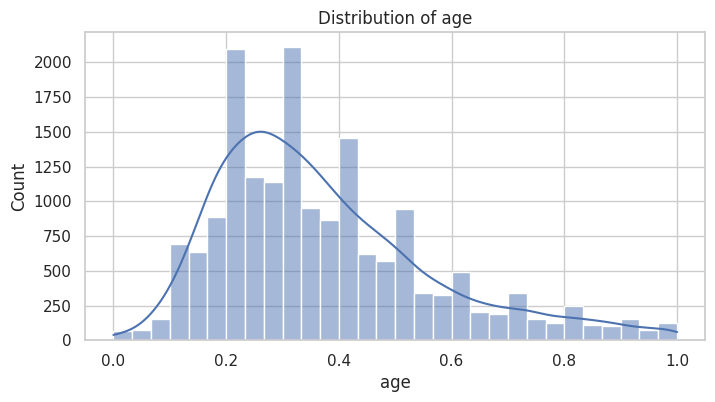

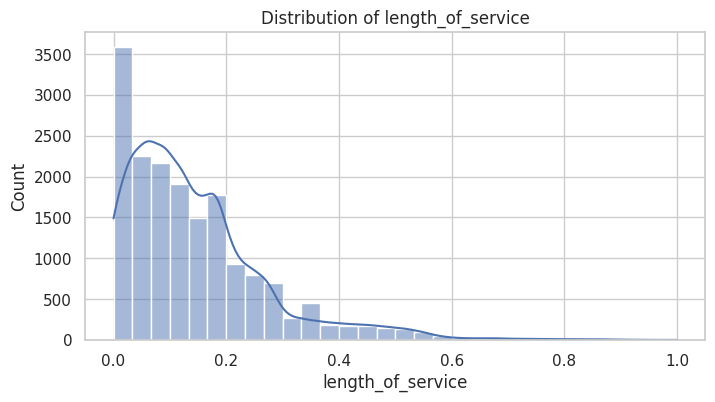

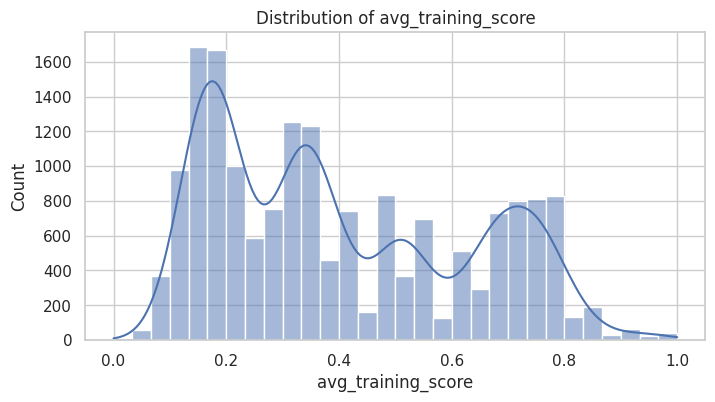

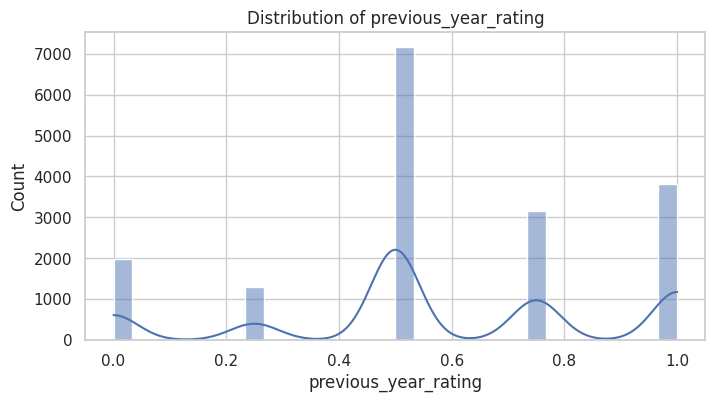

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

#Plot distributions of numerical features
numerical_features = ['age', 'length_of_service', 'avg_training_score', 'previous_year_rating']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()

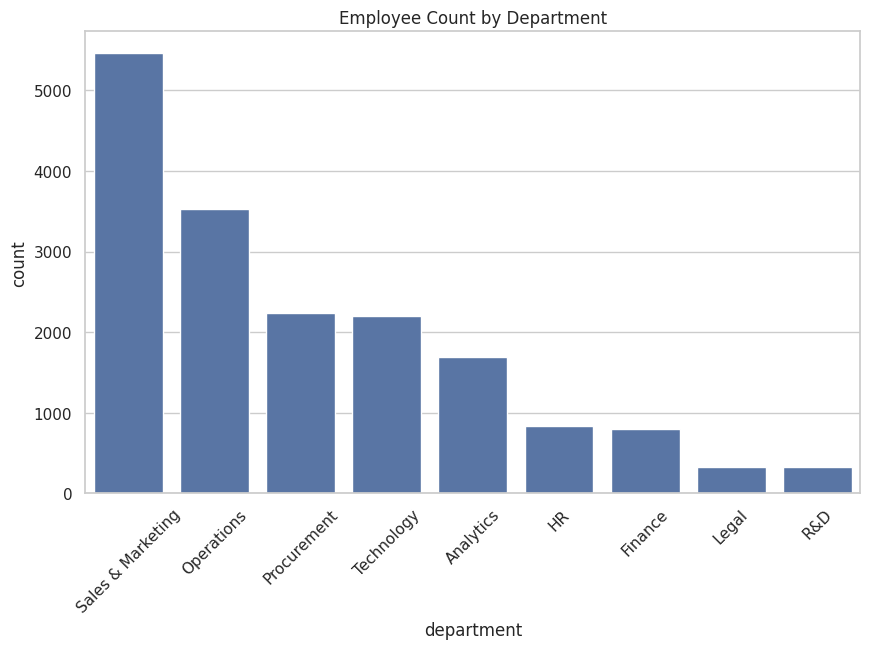

In [15]:
# Plot count of employees by department
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='department', order=df['department'].value_counts().index)
plt.title("Employee Count by Department")
plt.xticks(rotation=45)
plt.show()

<ipython-input-16-241b9673f89d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='department', y='avg_training_score', ci=None, order=df['department'].value_counts().index)


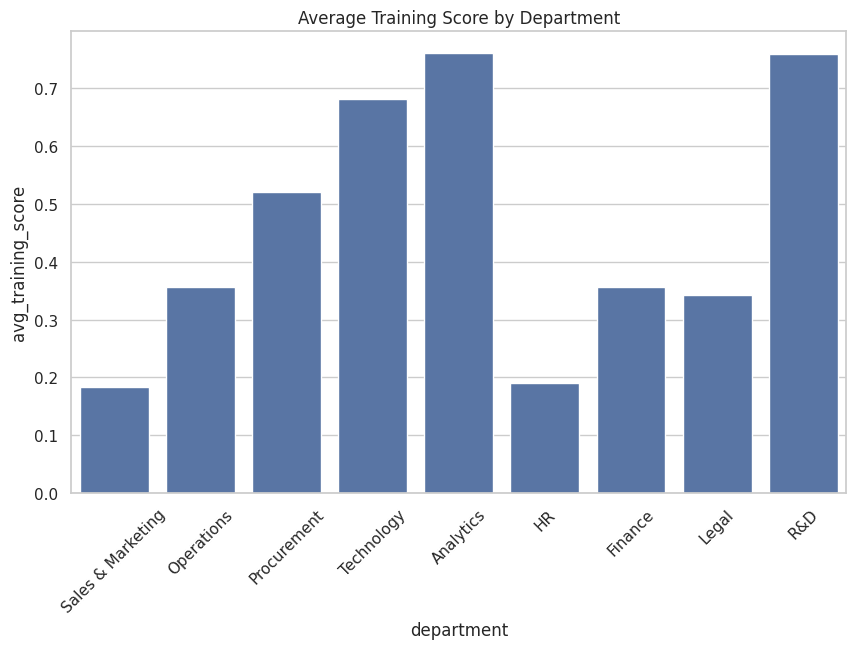

In [16]:
#Plot average training score by department
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='department', y='avg_training_score', ci=None, order=df['department'].value_counts().index)
plt.title("Average Training Score by Department")
plt.xticks(rotation=45)
plt.show()

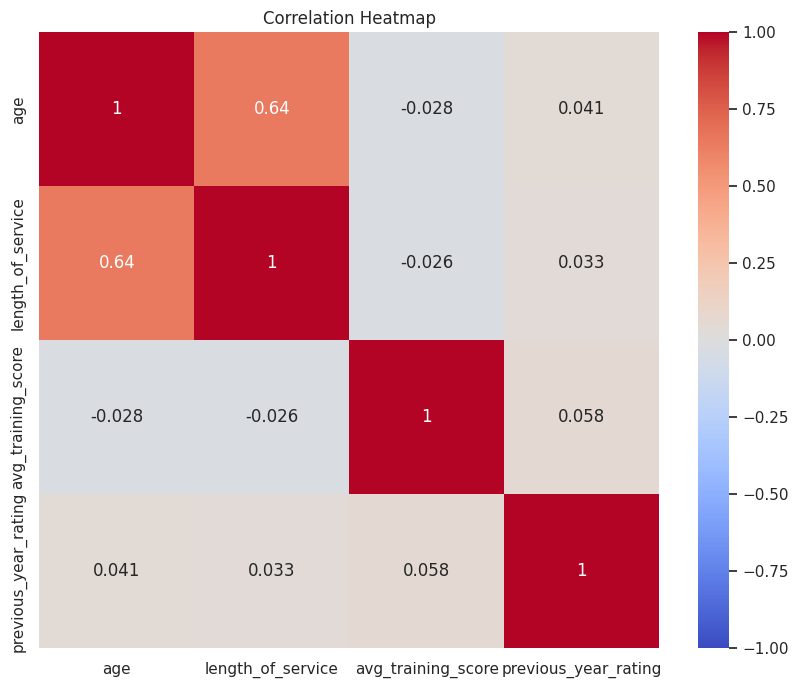

In [17]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-18-2ba1b1eab10c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='education', y='avg_training_score', ci=None, order=df['education'].value_counts().index)


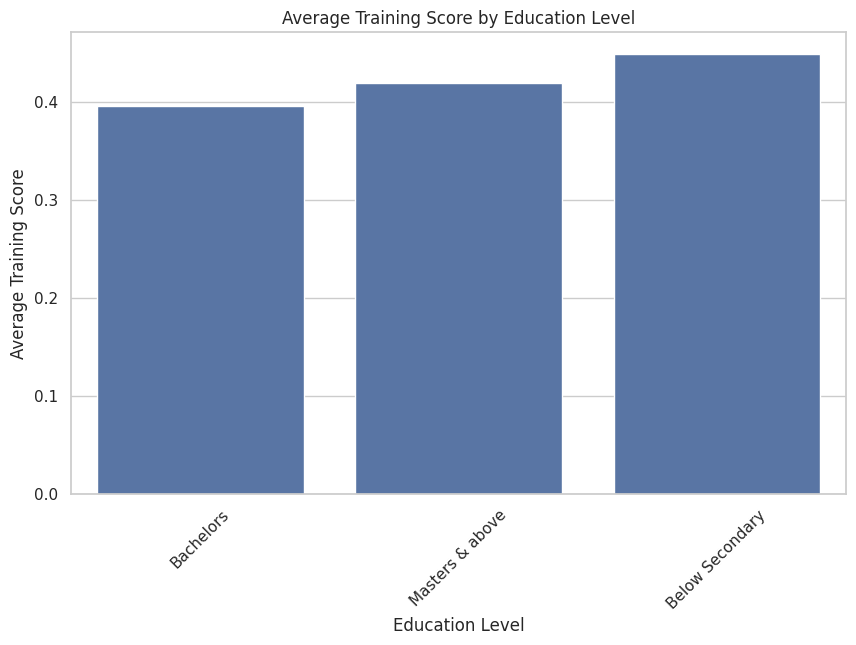

In [18]:
# Plot avaerage training score by education level
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='education', y='avg_training_score', ci=None, order=df['education'].value_counts().index)
plt.title("Average Training Score by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Training Score")
plt.xticks(rotation=45)
plt.show()

<ipython-input-19-5ce2663233d2>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=award_proportion, x='education', y='awards_won', ci=None, order=award_proportion['education'])


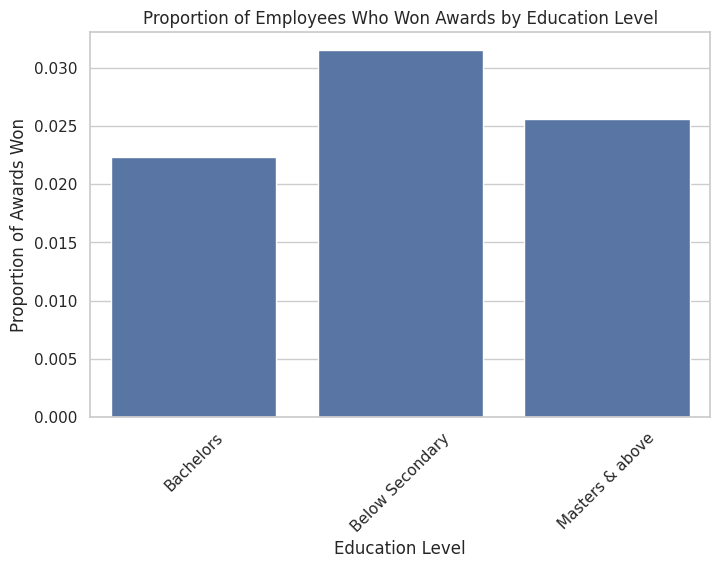

In [19]:
# Plot proportion of employees who won awards by education level
award_proportion = df.groupby('education')['awards_won'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=award_proportion, x='education', y='awards_won', ci=None, order=award_proportion['education'])
plt.title("Proportion of Employees Who Won Awards by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Proportion of Awards Won")
plt.xticks(rotation=45)
plt.show()

<ipython-input-20-64b138204bb4>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=kpi_proportion, x='education', y='KPIs_met_more_than_80', ci=None, order=kpi_proportion['education'])


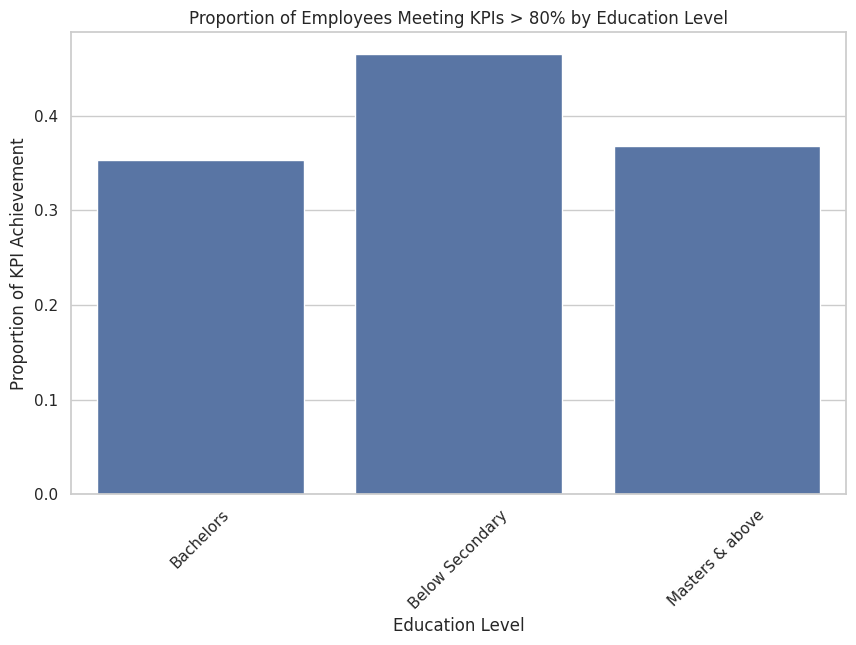

In [20]:
# Plot KPI achievement (>80%) by education level
kpi_proportion = df.groupby('education')['KPIs_met_more_than_80'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=kpi_proportion, x='education', y='KPIs_met_more_than_80', ci=None, order=kpi_proportion['education'])
plt.title("Proportion of Employees Meeting KPIs > 80% by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Proportion of KPI Achievement")
plt.xticks(rotation=45)
plt.show()

In [21]:
# Step 1: Set target variable
target = 'KPIs_met_more_than_80'

# Step 2: Encode categorical features using one-hot encoding
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Step 3: Engineer interaction feature: service * training score
df_encoded['service_training_interaction'] = df_encoded['length_of_service'] * df_encoded['avg_training_score']

# Step 4: Log-transform skewed numerical feature (if necessary)
import numpy as np
df_encoded['log_length_of_service'] = np.log1p(df_encoded['length_of_service'])

# Display the first few rows
df_encoded.head()


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,department_Finance,department_HR,...,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Masters & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,service_training_interaction,log_length_of_service
0,8724,1,0.100,0.50,0.000000,1,0,0.633333,False,False,...,False,False,False,False,False,True,False,True,0.000000,0.000000
1,74430,1,0.275,0.50,0.121212,0,0,0.200000,False,True,...,False,False,False,False,False,False,False,False,0.024242,0.114410
2,72255,1,0.275,0.00,0.090909,0,0,0.133333,False,False,...,False,False,False,False,False,True,False,False,0.012121,0.087011
3,38562,3,0.275,0.25,0.242424,0,0,0.433333,False,False,...,False,False,False,False,False,False,False,False,0.105051,0.217065
4,64486,1,0.250,0.75,0.181818,0,0,0.366667,True,False,...,False,False,False,False,False,True,False,True,0.066667,0.167054


In [22]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Step 1: Define features and target
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Step 2: Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train models and evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    if y_pred_proba is not None:
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\n")


--- Logistic Regression ---
Accuracy: 0.7113
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.80      2253
           1       0.64      0.42      0.51      1231

    accuracy                           0.71      3484
   macro avg       0.69      0.65      0.65      3484
weighted avg       0.70      0.71      0.69      3484

ROC-AUC Score: 0.7307


--- Random Forest ---
Accuracy: 0.7006
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79      2253
           1       0.62      0.40      0.49      1231

    accuracy                           0.70      3484
   macro avg       0.67      0.63      0.64      3484
weighted avg       0.69      0.70      0.68      3484

ROC-AUC Score: 0.7220


--- Gradient Boosting ---
Accuracy: 0.7153
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80    

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and evaluate on the test set
best_gb_model = random_search.best_estimator_
y_pred = best_gb_model.predict(X_test)
y_pred_proba = best_gb_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", random_search.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.05}
Accuracy: 0.7156
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80      2253
           1       0.65      0.41      0.51      1231

    accuracy                           0.72      3484
   macro avg       0.69      0.65      0.65      3484
weighted avg       0.71      0.72      0.70      3484

ROC-AUC Score: 0.7429


In [24]:
import joblib

# Step 1: Save the trained model
model_filename = 'best_gradient_boosting_model.pkl'
joblib.dump(best_gb_model, model_filename)
print(f"Model saved as {model_filename}")

# Step 2: Create a prediction function
def predict_kpi(input_data):
    """
    Function to predict whether an employee meets KPIs based on input data.
    Args:
    input_data (DataFrame): A pandas DataFrame with the same features used for training.

    Returns:
    prediction (int): 1 if KPI is met or exceeded, 0 otherwise.
    probability (float): Probability of meeting KPI.
    """
    # Load the model
    loaded_model = joblib.load(model_filename)

    # Ensure the input data is scaled
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = loaded_model.predict(input_data_scaled)
    probability = loaded_model.predict_proba(input_data_scaled)[:, 1]

    return prediction, probability


Model saved as best_gradient_boosting_model.pkl
